In [846]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

Read Data

In [847]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Analysis

In [848]:
df.shape

(1338, 7)

In [849]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [850]:
df.duplicated().sum()

1

In [851]:
df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [852]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking if the data have differents scales

In [854]:
min_values = df.min()
max_values = df.max()
print("min", min_values, "max", max_values)

min age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object max age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object


In [855]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


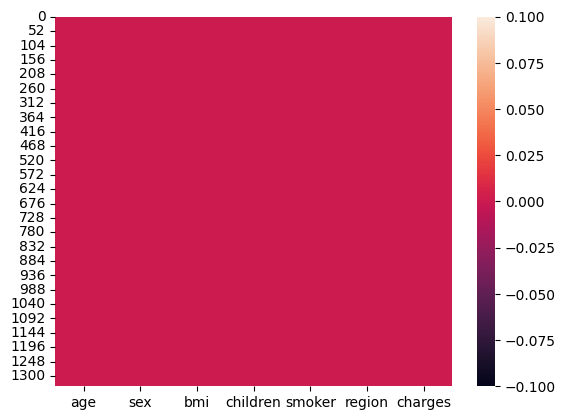

In [856]:
sns.heatmap(df.isnull())
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/null_heatmap.png")

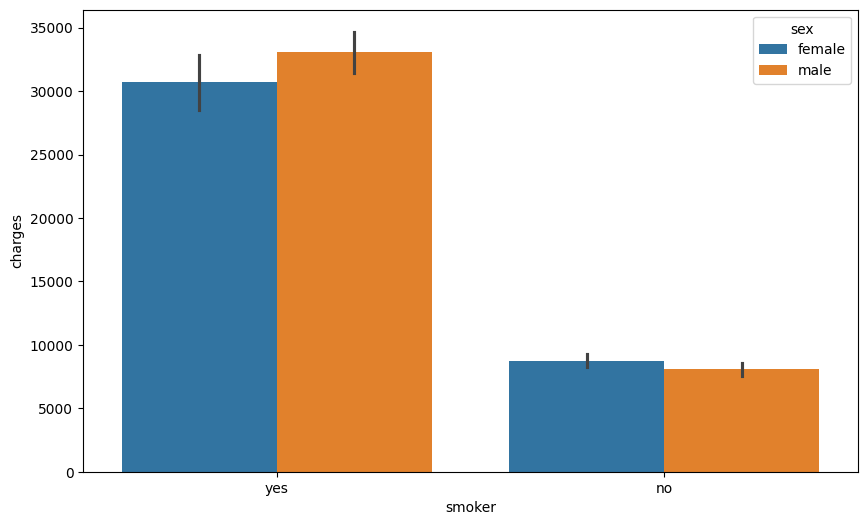

In [857]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot( data=df,x='smoker', y='charges', hue='sex')
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/smoker_vs_charges.png")
#Male smokers pays  more for health insurance

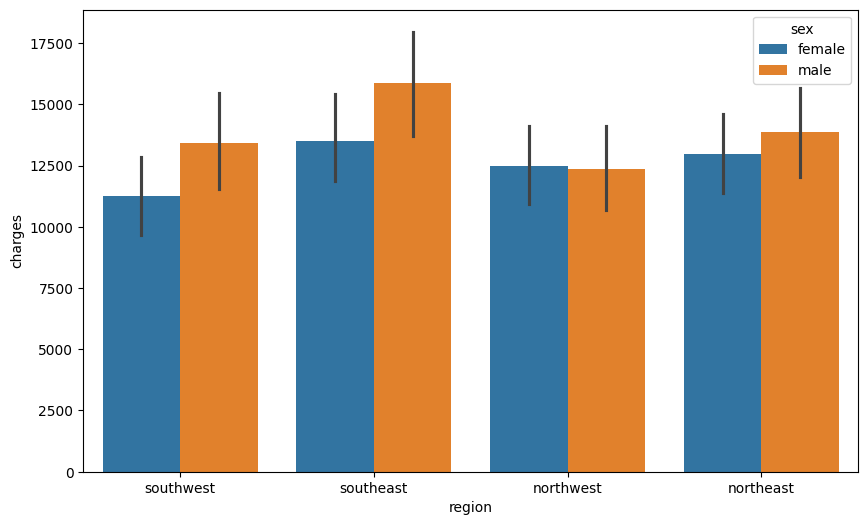

In [858]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot( data=df,x='region', y='charges', hue='sex')
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/sex_charges.png")
#Male pays pay more for health insurance

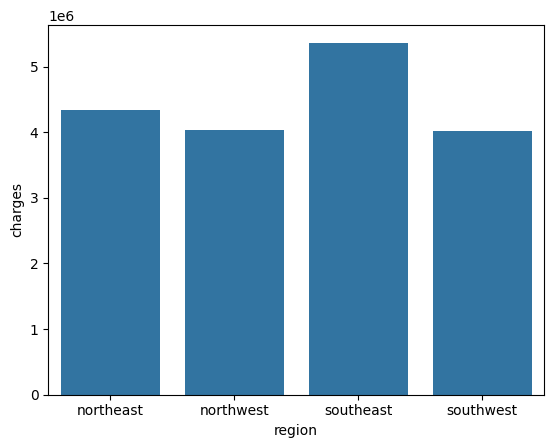

In [859]:
#Southeast have the mor expensives charges
grupped_region = df['charges'].groupby(by=df.region).sum()
grupped_region = grupped_region.reset_index()
sns.barplot(data=grupped_region, x='region', y='charges')
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/region_vs_charges.png")
plt.show()



In [860]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Numerical Features

In [861]:
df_numerical = df.select_dtypes(include=np.number)
df_numerical

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


Categorical Features

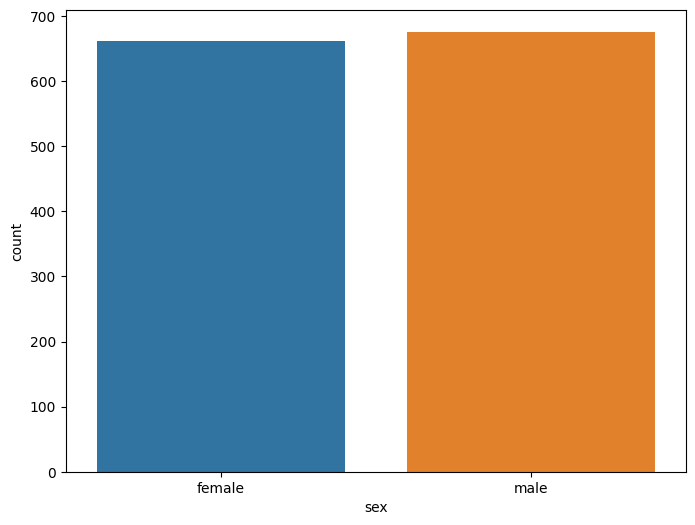

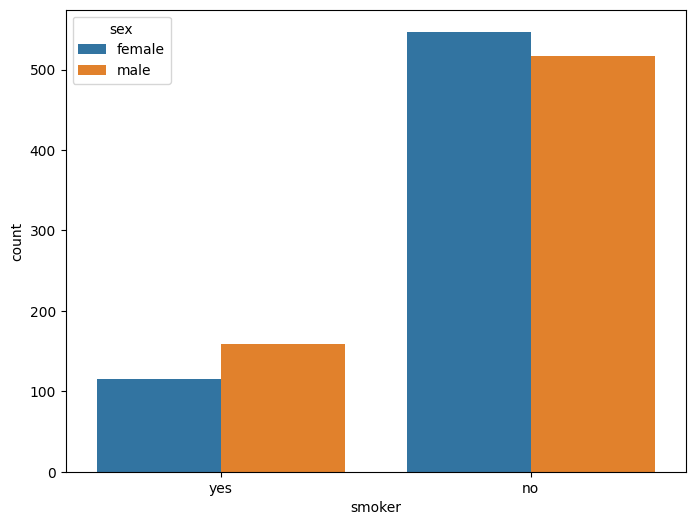

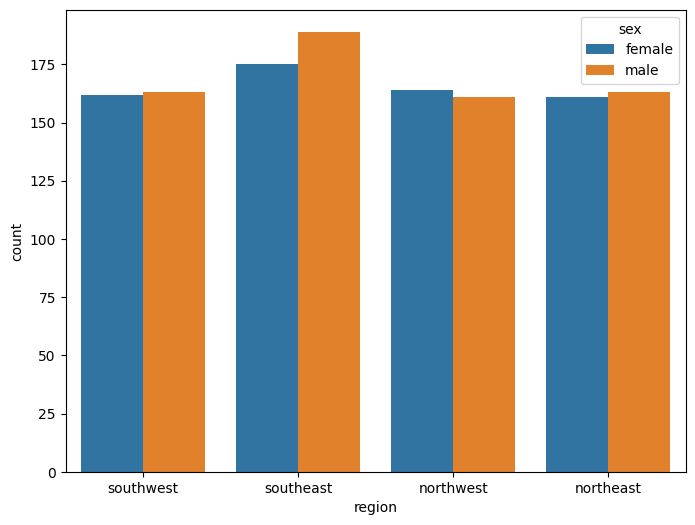

In [862]:
df_categorical = df.select_dtypes(include= ['object','category'])

for col in df_categorical.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df_categorical, x=col, hue='sex')
    plt.savefig(f"/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/cat_{col}.png") 
    plt.show()


In [863]:
label_encoder = preprocessing.LabelEncoder()
df_encoder = df_categorical.apply(label_encoder.fit_transform)
df_encoder

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [864]:
df_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


Total correlation : numerical and variable

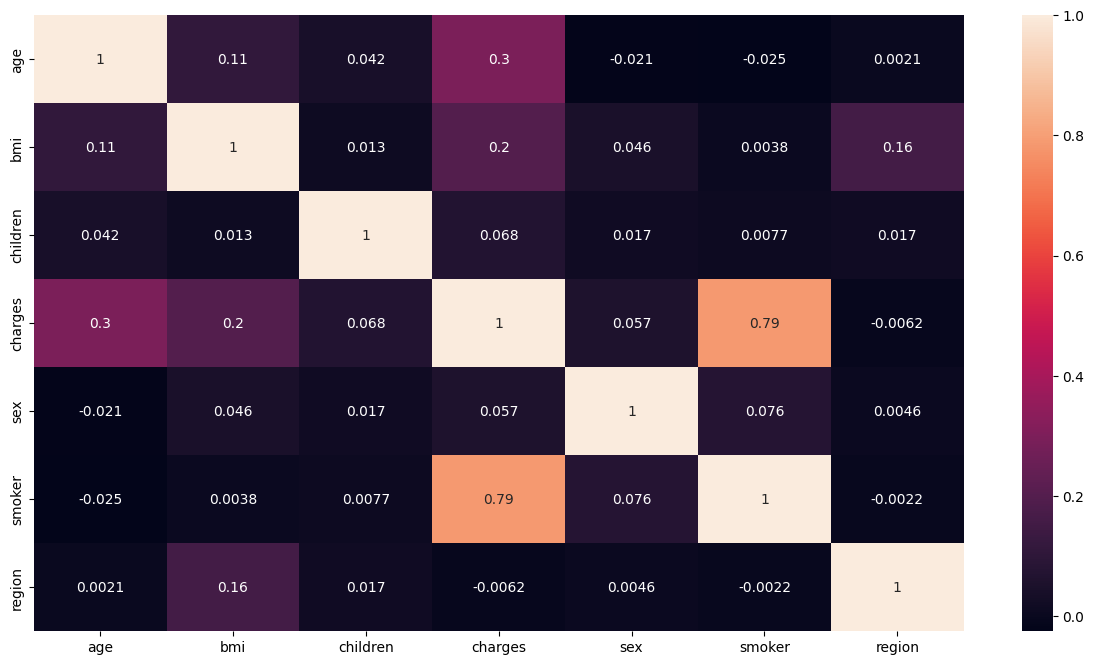

In [865]:
data_encoded = pd.concat([df_numerical,df_encoder], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(data_encoded.corr(), annot=True)
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/heatmap_data_encoded.png") 
#There is a correlation between smoker and charges

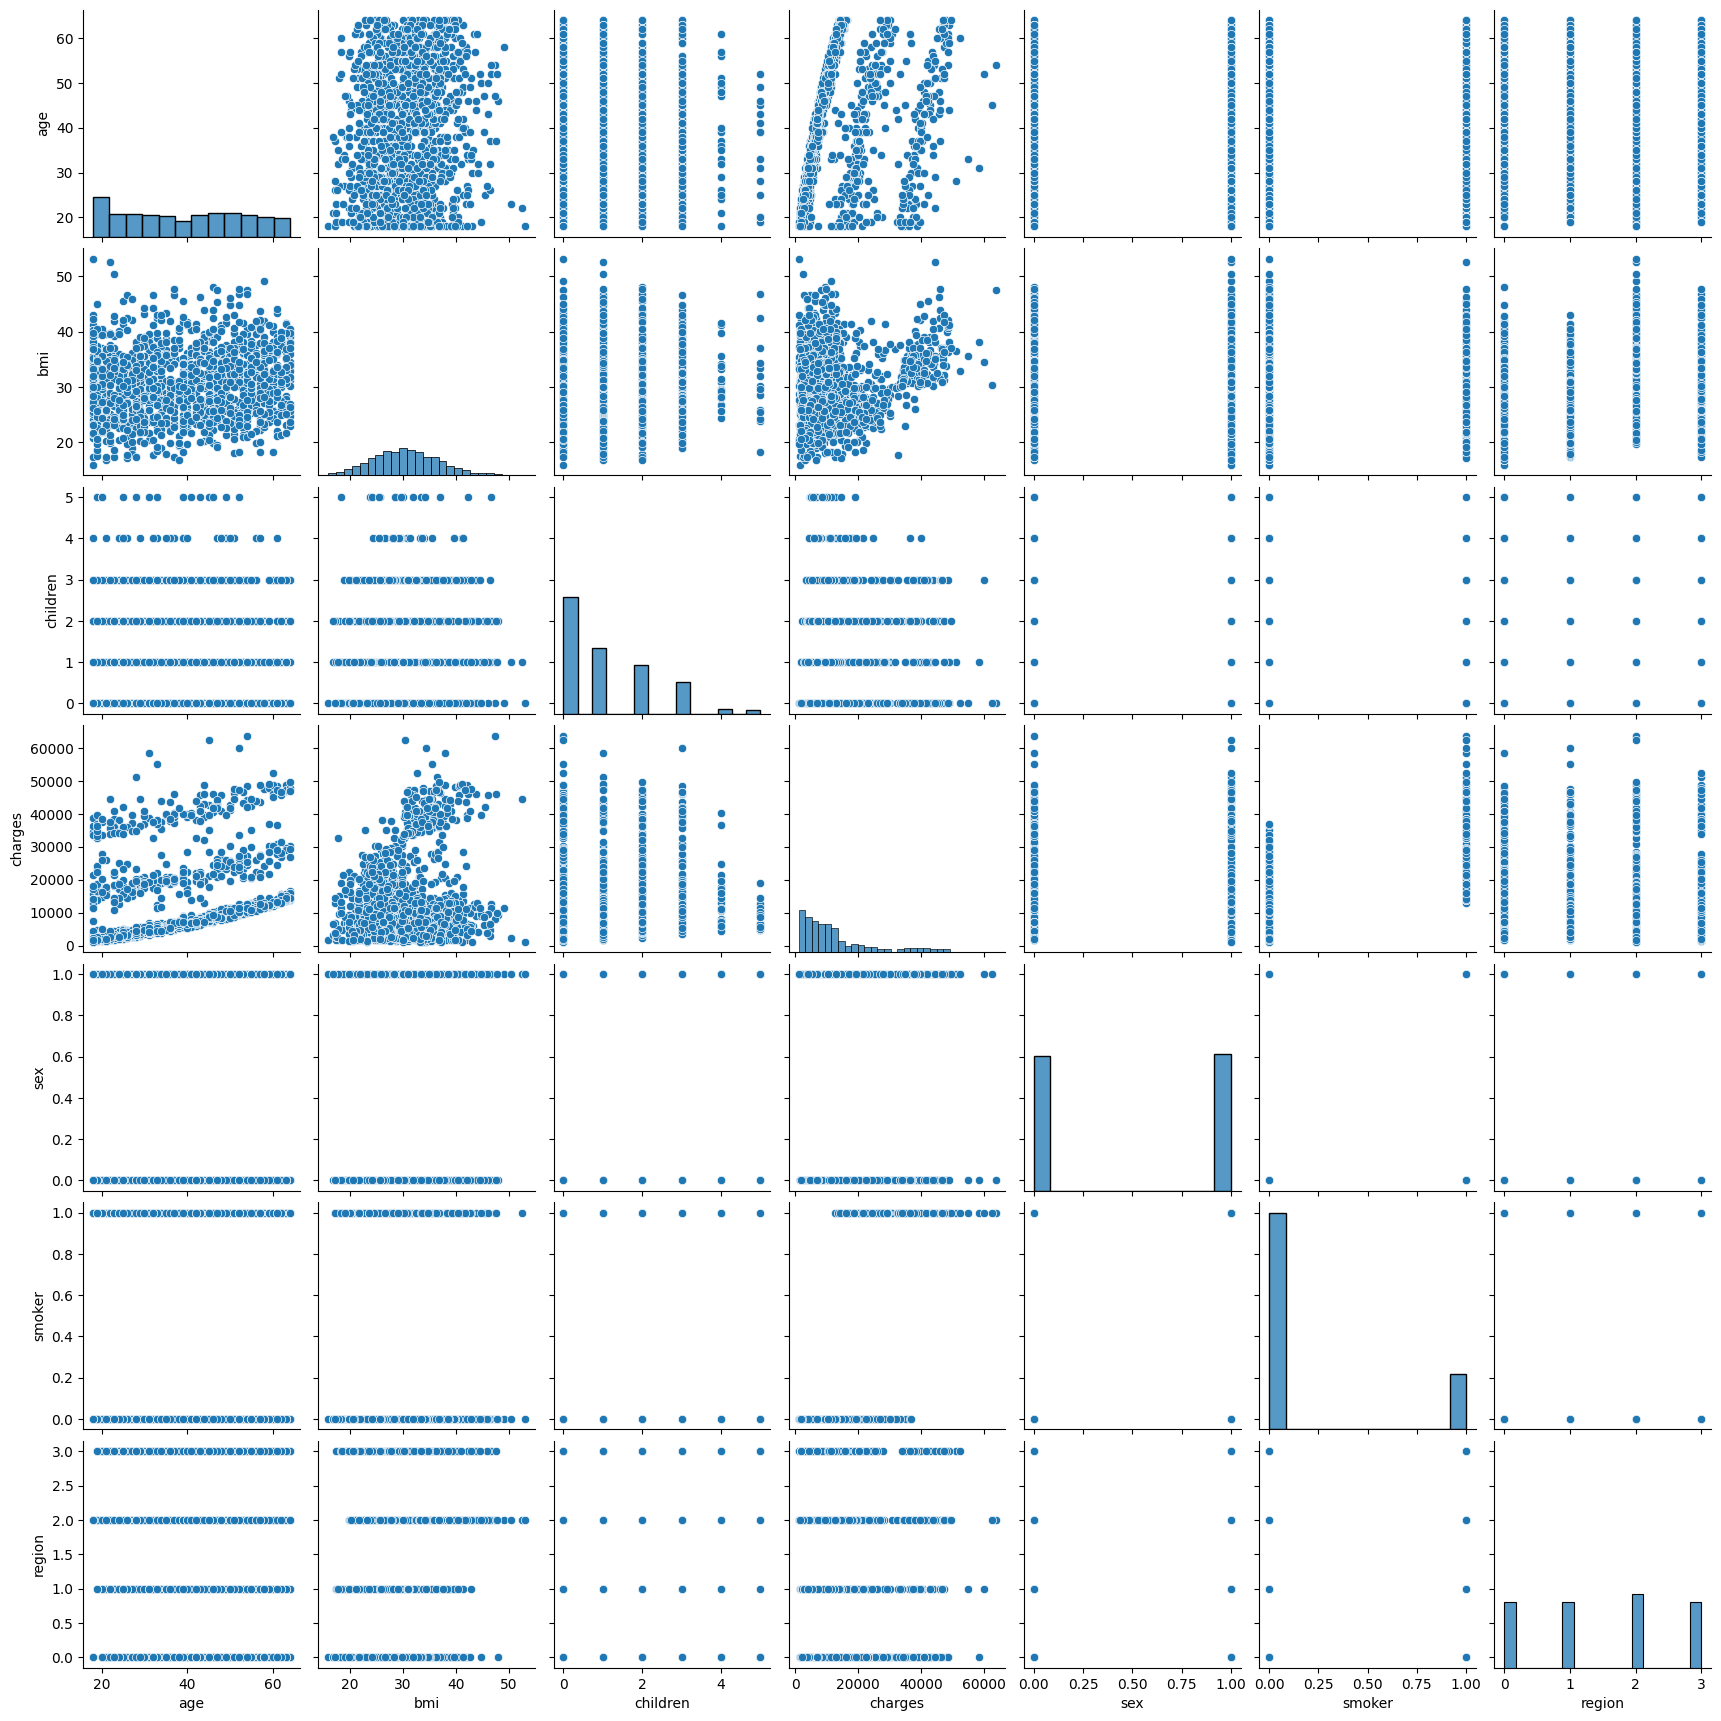

In [866]:
sns.pairplot(data_encoded)
plt.savefig("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/pairplot.png") 
plt.show()

Categorical data histogram

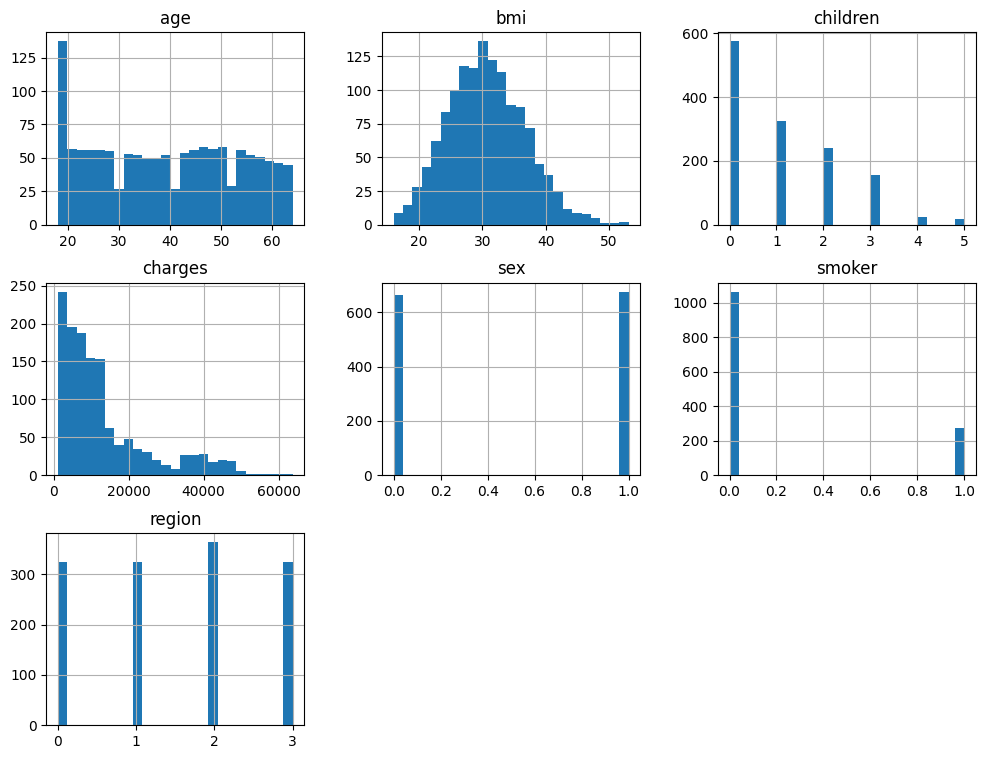

In [867]:
data_encoded.hist(bins=25, figsize=(12,9))
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/hist_encoded.png")
plt.show()

Training the data

In [868]:
data_encoded

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [869]:
x = data_encoded.drop("charges", axis = 1)
y = data_encoded["charges"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
x_train.head()

,age,bmi,children,sex,smoker,region
560,46,19.95,2,0,0,1
1285,47,24.32,0,0,0,0
1142,52,24.86,0,0,0,2
969,39,34.32,5,0,0,2
486,54,21.47,3,0,0,1


In [870]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, index = x_train.index, columns = x_train.columns)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, index = x_test.index, columns = x_test.columns)

x_train_scal.head()

,age,bmi,children,sex,smoker,region
560,0.608696,0.107345,0.4,0.0,0.0,0.333333
1285,0.630435,0.224913,0.0,0.0,0.0,0.000000
1142,0.739130,0.239440,0.0,0.0,0.0,0.666667
969,0.456522,0.493947,1.0,0.0,0.0,0.666667
486,0.782609,0.148238,0.6,0.0,0.0,0.333333


In [871]:
#top 3 columns that have the highest linear correlation with "charges"
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(x_train, y_train)
ix = selection_model.get_support()
x_train = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])
x_train.head()

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,sex,smoker,region
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,2.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0


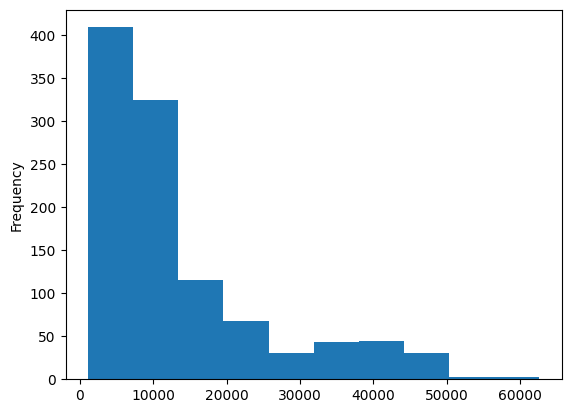

In [872]:
y_train.plot.hist()
plt.show()

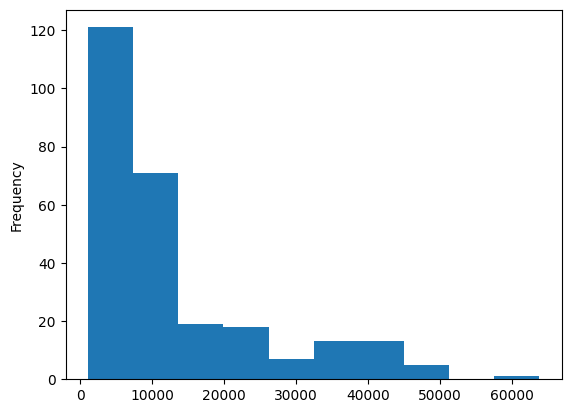

In [873]:
y_test.plot.hist()
plt.show()

In [874]:
x_train.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [875]:
lr = LinearRegression().fit(x_train, y_train)
lr

LinearRegression()

In [876]:
y_predictions = lr.predict(x_test)


In [877]:
mean_squared_error(y_test, y_predictions)


52881602.92932542

In [878]:
r2_score(y_test,y_predictions)

0.6593749757489802

In [879]:
print(f"Intercept (a): {lr.intercept_}")
print(f"Coefficients (b): {lr.coef_}")

Intercept (a): 8432.54512093347
Coefficients (b): [   38.86664703 23187.59734269    83.59504371]


Interpreting the linear regression equation

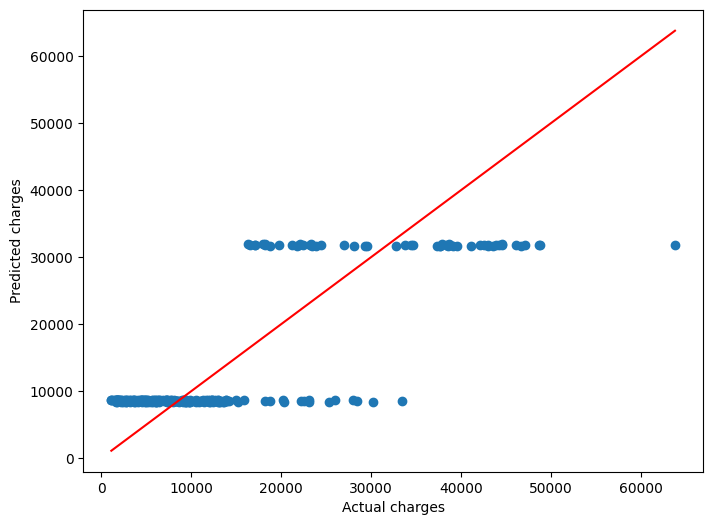

In [880]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")

plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

In [881]:
x_train.to_csv("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/processed/x_train.csv")
y_train.to_csv("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/processed/y_train.csv")
x_test.to_csv("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/processed/x_test.csv")
y_test.to_csv("/Users/nandapop/Documents/Bootcamp/linear_regression/linear_regression/data/processed/y_test.csv")